In [13]:
import sys
import os

Now were going to set up a csv file and begin sanitizing it

In [3]:
csv_file = 'dumps/M5_hist_EURUSD.csv'

And set up our analysis system

In [26]:
def findDateTime(row):
    import re
    y = re.compile("[0-9]{4,4}")
    m = re.compile("[01-12]{2,2}")
    d = re.compile("[01-31]{2,2}")
    i = 0
    if y.match(row[0]):
        year = y.match(row[0])
        month = m.match(row[0])
        day = d.match(row[0])
        print("Match Found %s/%s/%s"%(year, month, day))
    else:
        print('No Match')
    return
            
            

In [1]:
    def analyze(self, data):
        import csv
        import re
        text_input = re.compile("^([A-Z])")
        file = open(data, 'r')
        file = csv.reader(file, delimiter=',')
        ncol=len(next(file)) # Read first line and count columns
        with open(data, newline='') as csvfile:
            input = csv.reader(csvfile, delimiter=',')
            for row in input:
                # Check for header
                if text_input.match(row[0]):
                    pass
                else:
                    # Work on input data here
                    _dateTime = self.findDateTime(row)
                    _open = row[2]
                    _high = row[3]
                    _low = row[3]
                    _close = row[4]
                    _volume = row[5]
            return

In [130]:
import pandas as pd
from modules import storage
import sqlite3

def analyze_history(pair):
    con = sqlite3.connect('storage/neuralnet.db')
    df = pd.read_sql("SELECT * FROM %s"%(pair), con, parse_dates='timestamp', index_col='timestamp')
    df['open'].plot()
    df['high'].plot()
    df['low'].plot()
    df['close'].plot()

In [72]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

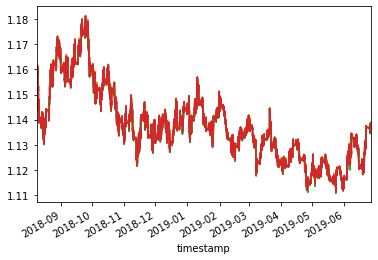

In [131]:
analyze_history('EURUSD')

In [16]:
import pandas_datareader as pdr

df = pdr.av.forex.AVForexReader(symbols='EUR/USD', api_key='U8HB1I2CAKK8E3NO')
df.read()

,EUR/USD
From_Currency Code,EUR
From_Currency Name,Euro
To_Currency Code,USD
To_Currency Name,United States Dollar
Exchange Rate,1.12890000
Last Refreshed,2019-07-01 22:26:43
Time Zone,UTC
Bid Price,1.12890000
Ask Price,1.12890000


Oanda Request for getting candle information

In [89]:
import requests
import pandas as pd
import json
from mpl_finance import candlestick_ohlc


payload = {
    "granularity":"S5",
    # "from":"",
    # "to":""
}
token = '00a07a87ae0cfd7313343971e50bbb19-83fc949e052da75e40a2d3f18475fe98'
r=requests.get('https://api-fxpractice.oanda.com/v3/instruments/EUR_USD/candles', 
               headers={"Authorization":"Bearer %s"%(token)},
               params=payload
              )
import pprint

data = json.dumps(r.json()['candles'])
df = pd.read_json(data, orient='records', typ='frame')
df.head()
df.plot()

pprint.pprint(df.head())

TypeError: Empty 'DataFrame': no numeric data to plot